In [10]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [11]:
# Dependencies
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [12]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [13]:
# load csv data
weather = pd.read_csv('../WeatherDataPull/dataLargerSet.csv')
weather.head()

,Unnamed: 0,index,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,0,6,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,1,7,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,2,8,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,3,9,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,4,10,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [14]:
# drop unnecessary columns
weatherClean=weather.drop(["Unnamed: 0", "index"], axis=1)
weatherClean.head()

,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,12.870968,61.387097,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,35.032258,76.903226,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,21.387097,61.677419,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [15]:
# Data Pre-Processing

In [16]:
weatherClean.columns

Index(['winery', 'vintage', 'points', 'cities', 'MarchLowTemp',
       'MarchHighTemp', 'MarchAvgTemp', 'MarchPrecip', 'MarchCloudiness',
       'MarchHumidity', 'AprilLowTemp', 'AprilHighTemp', 'AprilAvgTemp',
       'AprilPrecip', 'AprilCloudiness', 'AprilHumidity', 'MayLowTemp',
       'MayHighTemp', 'MayAvgTemp', 'MayPrecip', 'MayCloudiness',
       'MayHumidity', 'JuneLowTemp', 'JuneHighTemp', 'JuneAvgTemp',
       'JunePrecip', 'JuneCloudiness', 'JuneHumidity', 'JulyLowTemp',
       'JulyHighTemp', 'JulyAvgTemp', 'JulyPrecip', 'JulyCloudiness',
       'JulyHumidity', 'AugLowTemp', 'AugHighTemp', 'AugAvgTemp', 'AugPrecip',
       'AugCloudiness', 'AugHumidity'],
      dtype='object')

In [17]:
# Drop columns that are not needed for MLR
weatherCleandf = weatherClean.drop(['winery', 'vintage', 'cities'], axis=1)

In [18]:
# Given the set of values for features, we have to predict the quality of wine. 
# Find correlation of each feature with our target variable 'points'

correlations = weatherCleandf.corr()['points'].drop('points')
print(correlations)

MarchLowTemp       0.017426
MarchHighTemp     -0.017353
MarchAvgTemp      -0.005979
MarchPrecip       -0.046759
MarchCloudiness    0.036910
MarchHumidity     -0.014875
AprilLowTemp       0.057485
AprilHighTemp      0.013467
AprilAvgTemp       0.027138
AprilPrecip       -0.003042
AprilCloudiness   -0.022679
AprilHumidity      0.037504
MayLowTemp         0.046140
MayHighTemp       -0.009394
MayAvgTemp         0.001652
MayPrecip         -0.047806
MayCloudiness     -0.044780
MayHumidity        0.038937
JuneLowTemp        0.067235
JuneHighTemp      -0.017018
JuneAvgTemp        0.004488
JunePrecip         0.022076
JuneCloudiness    -0.031466
JuneHumidity       0.064528
JulyLowTemp        0.077308
JulyHighTemp      -0.121021
JulyAvgTemp       -0.101566
JulyPrecip         0.029619
JulyCloudiness     0.113703
JulyHumidity       0.204394
AugLowTemp         0.069809
AugHighTemp       -0.106148
AugAvgTemp        -0.085107
AugPrecip          0.017319
AugCloudiness      0.085782
AugHumidity        0

In [19]:
# Dropped one column per iteration based on lack of importance
X = weatherCleandf.drop(['points', 'MarchLowTemp', 'AprilHumidity', 'MayPrecip', 'JuneCloudiness', 
                         'MarchHumidity', 'JulyHumidity', 'MayCloudiness', 'JuneLowTemp',
                        'AugLowTemp', 'AugCloudiness', 'MayHumidity', 'MayLowTemp',
                        'JulyCloudiness', 'AprilLowTemp', 'JulyPrecip', 'JuneHumidity',
                        'AugHumidity', 'JunePrecip', 'JuneHighTemp', 'MarchCloudiness',
                        'MarchPrecip', 'AprilCloudiness', 'MarchAvgTemp', 'MarchHighTemp',
                        'JuneAvgTemp', 'AprilHighTemp', 'AprilAvgTemp', 'JulyLowTemp',
                        'AugPrecip', 'AprilPrecip'], axis=1)
y = weatherCleandf['points']

In [20]:
# view the columns of weatherCleandf along with positional index
df = pd.DataFrame([X.columns]).T
df

,0
0,MayHighTemp
1,MayAvgTemp
2,JulyHighTemp
3,JulyAvgTemp
4,AugHighTemp
5,AugAvgTemp


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [22]:
print(y_test)

1201    91
115     88
979     87
175     90
63      92
        ..
1264    88
638     87
626     98
1008    87
178     88
Name: points, Length: 332, dtype: int64


In [23]:
# Fit linear regression to training data
model = LinearRegression()
model.fit(X_train,y_train)
  
# This gives the coefficients of the features selected above.  
print(model.coef_)

[ 0.61649062 -0.55806005 -1.12702169  1.08679614  0.50944841 -0.56084573]


Feature: 0, Score: 0.61649
Feature: 1, Score: -0.55806
Feature: 2, Score: -1.12702
Feature: 3, Score: 1.08680
Feature: 4, Score: 0.50945
Feature: 5, Score: -0.56085


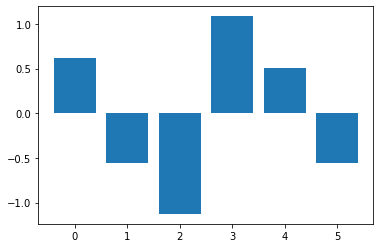

In [24]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [25]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.052439389608639586
Testing Score: 0.0624801372793623


Text(0.5, 1.0, 'Residual Plot')

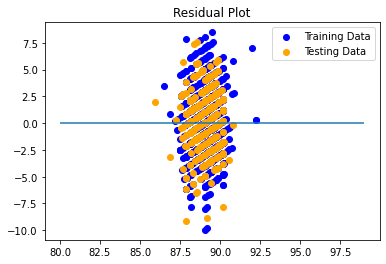

In [26]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [27]:
train_pred = model.predict(X_train)
print(train_pred)
test_pred = model.predict(X_test) 
print(test_pred)

[89.72840342 88.43017266 86.46783062 89.49340773 89.08375413 90.2114667
 89.50376    88.93289631 88.31043995 90.16438579 88.93289631 88.80137191
 88.73521194 89.25177418 88.89875797 89.43853098 89.39397514 87.84935507
 89.69476945 89.53793162 88.11312363 89.27171811 88.78437797 88.89875797
 90.16438579 89.05156129 89.27171811 89.82597841 90.06974905 89.27171811
 88.82819305 89.55190186 89.05737201 89.8759956  89.27171811 88.65748691
 87.84935507 89.67652573 89.05737201 89.11903227 88.85416795 89.02443616
 88.43506385 89.77070166 90.16438579 89.56265622 89.07457575 89.75891269
 90.15892176 88.11312363 87.84935507 90.2114667  88.58796204 89.5894495
 88.18712438 89.25333806 89.98368788 89.03934634 89.8759956  87.67989512
 90.15892176 89.85614338 87.84935507 89.02790005 87.56293699 89.05737201
 89.17259556 89.39397514 88.73664972 89.7294741  90.16438579 89.40379883
 89.05508221 88.44466467 89.43861294 87.84935507 89.02790005 89.0622226
 89.02790005 88.73664972 89.17104562 89.63994448 87.69